In [341]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.feature_selection import SequentialFeatureSelector

In [342]:
# display formatting for floats
pd.options.display.float_format = '{:,.4f}'.format

In [343]:
categorical_feature_cols = [
    'Background',
    'Earring',
    'Mouth',
    'Clothes',
    'Hat',
    'Fur',
    'Eyes',
]

In [344]:
df = pd.read_csv('feature_engineered.csv', parse_dates=['SaleDate']).rename(columns={'index': 'TokenId'})

## Scaling and Normalizing Target

In [345]:
df['PctExtensionEWMScaled'] = np.log(df['PctExtensionEWM']+2)

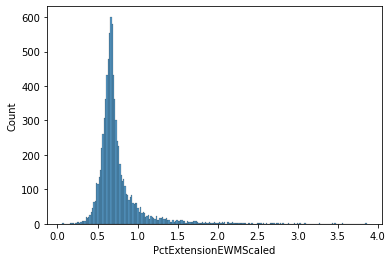

In [346]:
import seaborn as sns
sns.histplot(df['PctExtensionEWMScaled'])

## Encoding Categorical Features

In [347]:
enc = OneHotEncoder(handle_unknown='ignore')

In [348]:
enc_df = pd.DataFrame(enc.fit_transform(df[categorical_feature_cols]).toarray())
enc_df.columns = enc.get_feature_names_out()
dfp = pd.concat([df, enc_df], axis=1, join="inner") # concatente encoded df
dfp = dfp.drop(columns=categorical_feature_cols)
dfp.to_csv('processed.csv', index=False)

In [332]:
dfp

,TokenId,LastSalePrice,BackgroundRarity,EarringRarity,FurRarity,EyesRarity,MouthRarity,ClothesRarity,HatRarity,LastSaleToken,...,Eyes_Hypnotized,Eyes_Laser Eyes,Eyes_Robot,Eyes_Sad,Eyes_Scumbag,Eyes_Sleepy,Eyes_Sunglasses,Eyes_Wide Eyed,Eyes_X Eyes,Eyes_Zombie
0,742,0.1200,0.1291,0.7023,0.0406,0.0352,0.0074,0.0235,0.0304,Ether,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000
1,832,0.1200,0.1242,0.7023,0.0778,0.0352,0.0091,0.0163,0.0089,Ether,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000
2,1026,0.0900,0.1273,0.7023,0.0778,0.1714,0.0438,0.0153,0.2690,Ether,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,1150,0.5000,0.1291,0.7023,0.1352,0.0710,0.1551,0.0224,0.0072,Ether,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,1685,0.1800,0.1266,0.0882,0.0302,0.0407,0.1551,0.3141,0.0578,Ether,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8382,387,51.6969,0.1242,0.7023,0.0626,0.0549,0.0266,0.0140,0.0182,Ether,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
8383,8645,50.0000,0.1266,0.7023,0.0406,0.1714,0.2272,0.3141,0.0377,Ether,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
8384,2263,69.0000,0.1242,0.7023,0.1352,0.0233,0.2272,0.0206,0.2690,Ether,...,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
8385,7737,49.8800,0.1273,0.0823,0.1229,0.0751,0.2272,0.0153,0.0157,Ether,...,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000


In [290]:
exclude_features = [
    'TokenId', 'LastSalePrice', 'LastSaleToken', 'SaleDate',
    'USDPrice', 'USDPriceMM', 'PctExtensionMM', 'AveragePctPriceIncrease'
]
# remove the rarity features since they are completely correlated with the categoricals
exclude_features.extend([feature for feature in dfp.columns if 'Rarity' in feature])
features = [feature for feature in dfp.columns if feature not in exclude_features]

In [245]:
X = dfp.loc[:, features]
y = dfp['PctExtensionMM']

## Feature Selection

In [98]:
sfs_forward = SequentialFeatureSelector(
    lasso, n_features_to_select=20, direction="forward"
).fit(X, y)

print(
    "Features selected by forward sequential selection: "
    f"{feature_names[sfs_forward.get_support()]}"
)

IndexError: boolean index did not match indexed array along dimension 0; dimension is 172 but corresponding boolean dimension is 173